# Function 1: 2D Radiation Detection

Explore the initial 10 (x, y) points, visualize the landscape, and suggest the next input to submit.

- 2D, sparse signal (only proximity yields non-zero reading).
- One hotspot; goal is to find it with limited queries.

### Write safety — what is read-only vs writable

- **Never written to (read-only):**
  - `initial_data/` — challenge data; this notebook and `load_challenge_data` only **read** from here. No code in this repo writes to `initial_data/`.
- **Written only when you enable the flag:**
  - `data/results/function_1_plot.png` — only if **IF_EXPORT_PLOT = True**
  - `data/submissions/function_1/next_input.npy` — only if **IF_EXPORT_QUERIES = True**
  - `data/problems/function_1/inputs.npy` and `outputs.npy` — only if **IF_APPEND_DATA = True** (append cell). This is your local copy (initial + appended points); re-running the append cell with the same new point will overwrite these two files with the same content (one more row). To avoid overwriting your accumulated data, keep **IF_APPEND_DATA = False** until you have new portal feedback to add.

**Summary:** With all flags `False`, running the notebook does not write any files. Turn only the flags you need to `True` for this run.

## 1. Setup and load data (read-only from initial_data)

In [58]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Project root: works whether you run from repo root or from notebooks/
repo_root = Path.cwd() if (Path.cwd() / "src").exists() else Path.cwd().parent
sys.path.insert(0, str(repo_root))
from src.utils.load_challenge_data import load_function_data, assert_not_under_initial_data

IF_SHOW_PLOT = True
IF_EXPORT_PLOT = False
IF_EXPORT_QUERIES = False
IF_APPEND_DATA = False

ImportError: cannot import name 'assert_not_under_initial_data' from 'src.utils.load_challenge_data' (/Users/nikolaskarefyllidis/Desktop/60_ML:AI/10 main optimization/10 ICL BBO Challenge/black-box-optimization/notebooks/../src/utils/load_challenge_data.py)

In [ ]:
# Load: use local appended data if available, else initial_data (read-only)
local_dir = repo_root / "data" / "problems" / "function_1"
local_inputs = local_dir / "inputs.npy"
local_outputs = local_dir / "outputs.npy"
if local_inputs.exists() and local_outputs.exists():
    X = np.load(local_inputs)
    y = np.load(local_outputs)
    if y.ndim > 1:
        y = y.squeeze()
    print("Loaded from local data (initial + appended):", local_dir)
else:
    X, y = load_function_data(function_id=1)
    print("Loaded from initial_data (read-only). Run 'Append data' after portal feedback to build local dataset.")
print('Dataset info:')
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X max value: {X.max():.4f}")
print(f"X min value: {X.min():.4f}")
print(f"y max value: {y.max():.4f}")
print(f"y min value: {y.min():.4f}")

Dataset info:
X shape: (10, 2)
y shape: (10,)
X max value: 0.8839
X min value: 0.0787
y max value: 0.0000
y min value: -0.0036


## 2. Visualize the 10 initial points

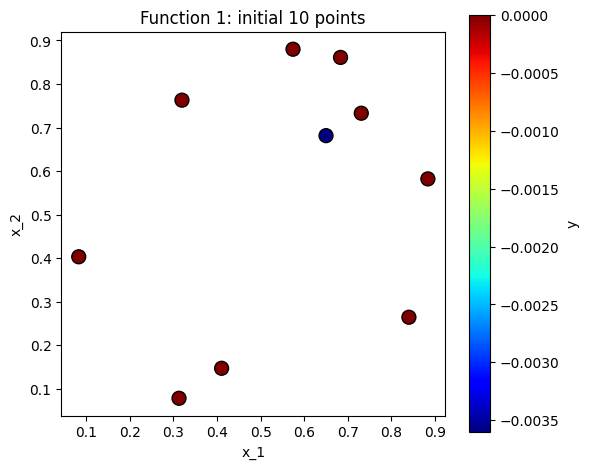

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 5))
sc = ax1.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="jet", edgecolors="k")
plt.colorbar(sc, ax=ax1, label="y")
ax1.set_ylabel("x_2")
ax1.set_xlabel("x_1")
ax1.set_title("Function 1: initial 10 points")
ax1.set_aspect("equal")
plt.tight_layout()
if IF_EXPORT_PLOT:
    out_path = repo_root / "data" / "results" / "function_1_plot.png"
    assert_not_under_initial_data(out_path, project_root=repo_root)
    out_path.parent.mkdir(parents=True, exist_ok=True)
    fig.savefig(out_path)
    print("Plot saved to", out_path)
if IF_SHOW_PLOT:
    plt.show()

## 3. Suggest next point to submit

Simple strategy: exploit around the best point (small random step) and optionally explore one random point. For week 1 we output one candidate: either a perturbation of the best or a random point in the domain.

In [ ]:
rng = np.random.default_rng(42)
best_idx = np.argmax(y)
best_x = X[best_idx].copy()

# Infer bounds from data (or use [0,1]^2 from config)
low = X.min(axis=0)
high = X.max(axis=0)
# Widen slightly so we can suggest points near the edges
margin = 0.05
low = np.clip(low - margin, 0, 1)
high = np.clip(high + margin, 0, 1)

# Option A: small step from best (exploit)
step = 0.1
next_x_exploit = best_x + rng.uniform(-step, step, size=2)
next_x_exploit = np.clip(next_x_exploit, 0, 1)

# Option B: random in domain (explore)
next_x_explore = rng.uniform(0, 1, size=2)

# Choose one to submit (e.g. exploit for sparse hotspot)
next_x = next_x_exploit
print("Suggested next x (exploit):", next_x)
print("Alternative (explore):", next_x_explore)

Suggested next x (exploit): [0.78581484 0.72077556]
Alternative (explore): [0.85859792 0.69736803]


## 4. Append new feedback (after portal returns)

After you submit and receive the new **(x, y)** from the portal for Function 1, paste the values below and run this cell. It appends the new point to a local dataset under `data/problems/function_1/`. The next time you run the notebook from the top, section 1 will load from this local dataset (initial + all appended points).

In [ ]:
if not IF_APPEND_DATA:
    print("IF_APPEND_DATA is False; append skipped. Set IF_APPEND_DATA = True and paste portal feedback below to run.")
else:
    # Paths (use repo_root from setup cell)
    _local_dir = repo_root / "data" / "problems" / "function_1"
    assert_not_under_initial_data(_local_dir, project_root=repo_root)
    _local_inputs = _local_dir / "inputs.npy"
    _local_outputs = _local_dir / "outputs.npy"

    # Set these from the portal feedback for Function 1 (one new input and one new output)
    x_new = np.array([0.472352, 0.625531], dtype=np.float64)  # replace with your submitted input
    y_new = -1.802e-144  # replace with the output returned (scalar)

    # Load current data (local if exists, else initial_data)
    if _local_inputs.exists() and _local_outputs.exists():
        X_cur = np.load(_local_inputs)
        y_cur = np.load(_local_outputs)
        if y_cur.ndim > 1:
            y_cur = y_cur.squeeze()
    else:
        X_cur, y_cur = load_function_data(function_id=1)

    # Append: one new row for inputs, one new value for outputs
    x_new = np.atleast_2d(x_new)
    X_updated = np.vstack((X_cur, x_new))
    y_updated = np.append(y_cur, y_new)

    # Save to local directory (do not overwrite read-only initial_data)
    _local_dir.mkdir(parents=True, exist_ok=True)
    np.save(_local_dir / "inputs.npy", X_updated)
    np.save(_local_dir / "outputs.npy", y_updated)
    print("Appended. Total points:", len(y_updated))
    print("Saved to", _local_dir)

## 5. Save suggestion for submission

Write the chosen x to `data/submissions/` so you can upload it to the portal. After you receive the new y, run section 4 (Append new feedback) to add it to your dataset, then re-run the notebook for the next round.

In [ ]:
if IF_EXPORT_QUERIES:
    out_dir = repo_root / "data" / "submissions" / "function_1"
    assert_not_under_initial_data(out_dir, project_root=repo_root)
    out_dir.mkdir(parents=True, exist_ok=True)
    np.save(out_dir / "next_input.npy", next_x)
    print("Saved to", out_dir / "next_input.npy")
else:
    print("IF_EXPORT_QUERIES is False; next_input.npy not saved.")

IF_EXPORT_QUERIES is False; next_input.npy not saved.
